# Zestaw zadań: Kwadratury adaptacyjne
## Zadanie 1
### Autor: Artur Gęsiarz

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad, quadrature
from scipy.optimize import fsolve

### Funkcja do calkowania

In [23]:
def function_to_integrate(x):
    return 4 / ( 1 + x ** 2 )

### Prawdziwa wartosc calki

In [24]:
true_value = np.pi

### Funkcja liczaca bład wzgledny

In [25]:
def relative_error(approx_value):
    return np.abs(approx_value - true_value) / np.abs(true_value)

### Funkcja obliczania kwadratury adaptacyjnej przy użyciu reguły trapezowej

In [26]:
def adaptive_trapezoidal(a, b, tol):
    def f(x):
        return quadrature(function_to_integrate, a, x, tol=tol)[0]

    result, _ = quad(f, a, b)
    return result

### Funkcja obliczania kwadratury adaptacyjnej przy użyciu metody Gaussa-Kronroda

In [27]:
def adaptive_gauss_kronrod(a, b, tol):
    result, _ = quad(function_to_integrate, a, b, epsabs=tol)
    return result

### Funkcja znajdująca rozwiązanie dla dodatniej liczby całkowitej

In [28]:
def find_positive_integer_solution(func, target_value, tol):
    def equation(x):
        return func(0, 1, x) - target_value

    solution = fsolve(equation, tol, xtol=1e-6)
    return int(np.round(solution[0]))

### Zakres wartości tolerancji

In [29]:
tolerances = np.logspace(2, -14, 20)

### Tablice do przechowywania wyników

In [30]:
trapezoidal_errors = []
gauss_kronrod_errors = []
trapezoidal_nevals = []
gauss_kronrod_nevals = []

### Obliczanie błędów i liczby ocen dla każdej tolerancji

In [31]:
for tol in tolerances:
    trapezoidal_result = adaptive_trapezoidal(0, 1, tol)
    gauss_kronrod_result = adaptive_gauss_kronrod(0, 1, tol)

    trapezoidal_errors.append(relative_error(trapezoidal_result))
    gauss_kronrod_errors.append(relative_error(gauss_kronrod_result))

    trapezoidal_nevals.append(find_positive_integer_solution(adaptive_trapezoidal, true_value, tol))
    gauss_kronrod_nevals.append(find_positive_integer_solution(adaptive_gauss_kronrod, true_value, tol))


/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24119/3642433406.py:3: DeprecationWarning: `scipy.integrate.quadrature` is deprecated as of SciPy 1.12.0and will be removed in SciPy 1.15.0. Please use`scipy.integrate.quad` instead.
  return quadrature(function_to_integrate, a, x, tol=tol)[0]
/var/folders/cw/20db57g90t309rc9w5fqkvjr0000gn/T/ipykernel_24119/3596730052.py:5: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  solution = fsolve(equation, tol, xtol=1e-6)


### Rysowanie wykresow

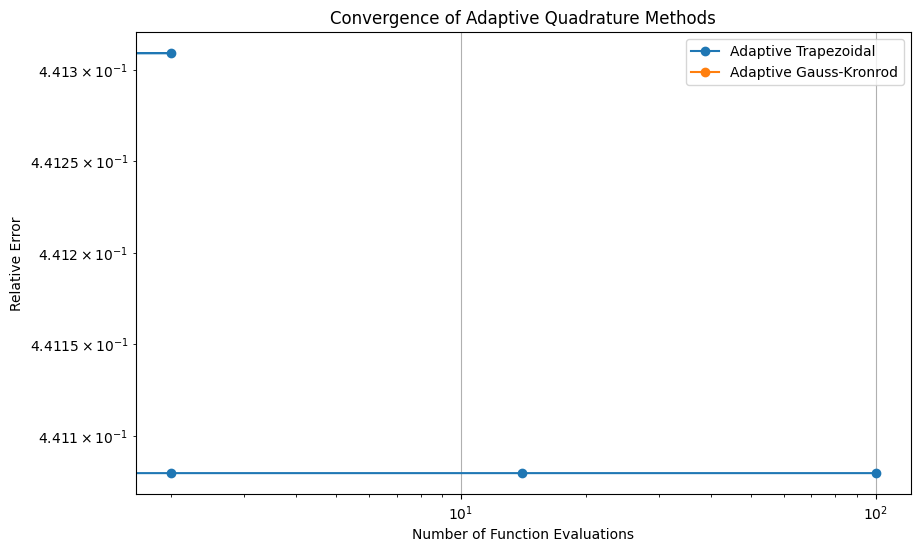

In [32]:
plt.figure(figsize=(10, 6))
plt.plot(trapezoidal_nevals, trapezoidal_errors, marker='o', label='Adaptive Trapezoidal')
plt.plot(gauss_kronrod_nevals, gauss_kronrod_errors, marker='o', label='Adaptive Gauss-Kronrod')
plt.xlabel('Number of Function Evaluations')
plt.ylabel('Relative Error')
plt.xscale('log')
plt.yscale('log')
plt.title('Convergence of Adaptive Quadrature Methods')
plt.legend()
plt.grid(True)
plt.show()